**1. Connect,install dan unduh dataset pada kaggle menggunakan API**

In [1]:
#Confirm API kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"m120t6084","key":"41e31a0a1a25d3a1bf9338b0e4f053ee"}'}

In [2]:
#Install kaggle dan download dataset dari kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d meetnagadia/share-price-of-top-electric-car-company

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 77.3MB/s]


**2. Import library**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import zipfile
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


**3. Menyiapkan Dataset**

In [4]:
#Variable local_zip berisi direktori lokasi file zip disimpan
local_zip = '/content/share-price-of-top-electric-car-company.zip'

#Proses ekstrak file zip
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/share-price-of-top-electric-car-company')
zip_ref.close()

In [5]:
#Memasukkan isi /content/share-price-of-top-electric-car-company/Top EV Company/BMW/bmw.csv kedalam variable base_dir
base_dir = '/content/share-price-of-top-electric-car-company/Top EV Company/BMW/bmw.csv'

**4.Pemahaman Data (Data Understanding)**

In [6]:
#Memuat Data pada sebuah Dataframe menggunakan pandas
data = pd.read_csv(base_dir)

In [7]:
#Memuat isi dataset (baris dan kolom)
data.shape

(1266, 7)

In [8]:
# Memuat informasi dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1266 non-null   object 
 1   Open       1266 non-null   float64
 2   High       1266 non-null   float64
 3   Low        1266 non-null   float64
 4   Close      1266 non-null   float64
 5   Adj Close  1266 non-null   float64
 6   Volume     1266 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.4+ KB


In [9]:
# Menghitung jumlah null pada setiap kolom
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Menghitung jumlah data kosong pada setiap kolom
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#Memuat 10 data pertama
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-24,77.250000,78.029999,76.690002,77.510002,61.236576,971047
1,2016-08-25,76.800003,76.839996,75.599998,76.220001,60.217419,1490961
2,2016-08-26,76.099998,77.290001,75.820000,77.230003,61.015369,1476195
3,2016-08-29,76.709999,77.230003,76.070000,76.879997,60.738838,708241
4,2016-08-30,77.440002,78.559998,77.110001,78.459999,61.987129,1213735
5,2016-08-31,78.379997,79.279999,78.010002,78.010002,61.631615,1314066
6,2016-09-01,78.269997,79.800003,77.550003,77.930000,61.568401,1480375
7,2016-09-02,78.370003,78.769997,76.660004,78.570000,62.074028,1593828
8,2016-09-05,78.970001,79.059998,78.239998,78.239998,61.813320,843916
9,2016-09-06,78.620003,78.620003,77.239998,77.550003,61.268185,1218090


In [12]:
#Memuat 10 data terakhir
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1256,2021-08-10,81.760002,82.160004,81.540001,81.849998,81.849998,646912
1257,2021-08-11,81.860001,82.480003,81.209999,82.290001,82.290001,763165
1258,2021-08-12,82.440002,83.400002,82.019997,83.360001,83.360001,971005
1259,2021-08-13,83.349998,83.900002,82.809998,83.089996,83.089996,703805
1260,2021-08-16,82.180000,82.570000,81.250000,81.470001,81.470001,849241
1261,2021-08-17,81.000000,81.199997,80.190002,80.349998,80.349998,1033666
1262,2021-08-18,80.519997,80.519997,78.940002,79.849998,79.849998,1366350
1263,2021-08-19,77.349998,78.449997,77.080002,77.430000,77.430000,1743934
1264,2021-08-20,77.000000,77.089996,75.410004,76.980003,76.980003,1731505
1265,2021-08-23,78.239998,78.480003,76.570000,76.800003,76.800003,1640966


In [13]:
# Memuat deskripsi setiap kolom dataframe
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1.266000e+03
mean,75.720063,76.463547,74.927330,75.711967,66.112437,1.748289e+06
std,11.337158,11.271610,11.370410,11.334323,9.251193,8.015524e+05
min,38.939999,39.514999,36.595001,37.660000,34.049023,0.000000e+00
25%,68.625000,69.367499,67.902502,68.679998,60.625791,1.219717e+06
50%,77.099998,77.784999,76.259998,77.215000,66.466117,1.570824e+06
75%,85.000000,85.745001,84.145001,85.052498,70.836777,2.048928e+06
max,97.050003,97.500000,94.919998,96.260002,95.889999,6.712618e+06


In [14]:
#Memuat 5 informasi awal dan akhir dataframe
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-24,77.250000,78.029999,76.690002,77.510002,61.236576,971047
1,2016-08-25,76.800003,76.839996,75.599998,76.220001,60.217419,1490961
2,2016-08-26,76.099998,77.290001,75.820000,77.230003,61.015369,1476195
3,2016-08-29,76.709999,77.230003,76.070000,76.879997,60.738838,708241
4,2016-08-30,77.440002,78.559998,77.110001,78.459999,61.987129,1213735
...,...,...,...,...,...,...,...
1261,2021-08-17,81.000000,81.199997,80.190002,80.349998,80.349998,1033666
1262,2021-08-18,80.519997,80.519997,78.940002,79.849998,79.849998,1366350
1263,2021-08-19,77.349998,78.449997,77.080002,77.430000,77.430000,1743934
1264,2021-08-20,77.000000,77.089996,75.410004,76.980003,76.980003,1731505


**5. Visualisasi Data**

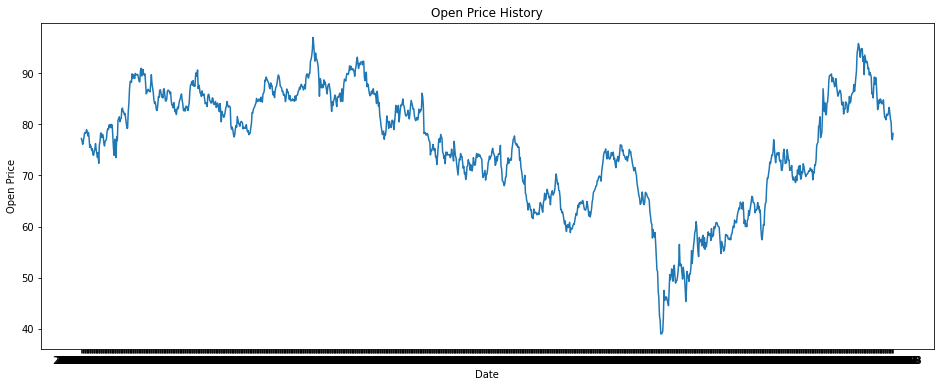

In [15]:
#Memvisualkan Harga dibukanya saham BMW (Open)
plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(data['Date'], data['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

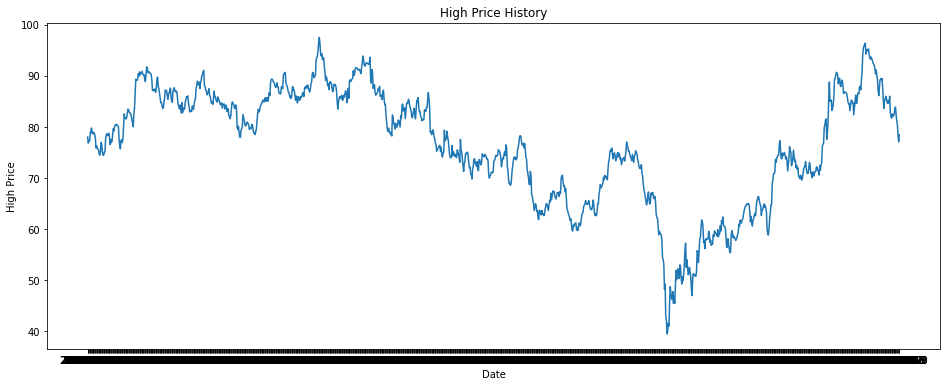

In [16]:
#Memvisualkan Harga tertinggi saham BMW (High)
plt.figure(figsize=(16,6))
plt.title('High Price History')
plt.plot(data['Date'], data['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

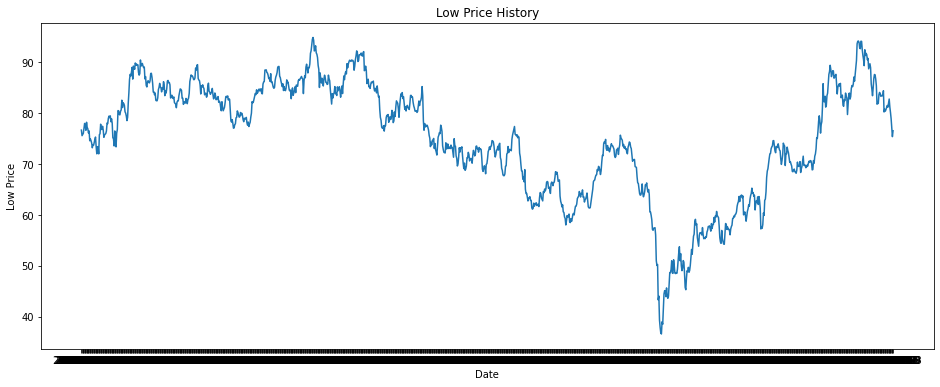

In [17]:
#Memvisualkan Harga terendah saham BMW (Low)
plt.figure(figsize=(16,6))
plt.title('Low Price History')
plt.plot(data['Date'], data['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

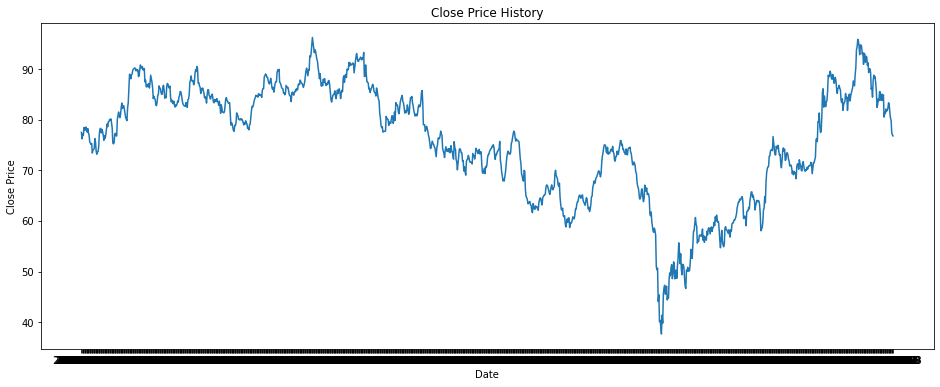

In [18]:
#Memvisualkan Harga ditutupnya saham BMW (Close)
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

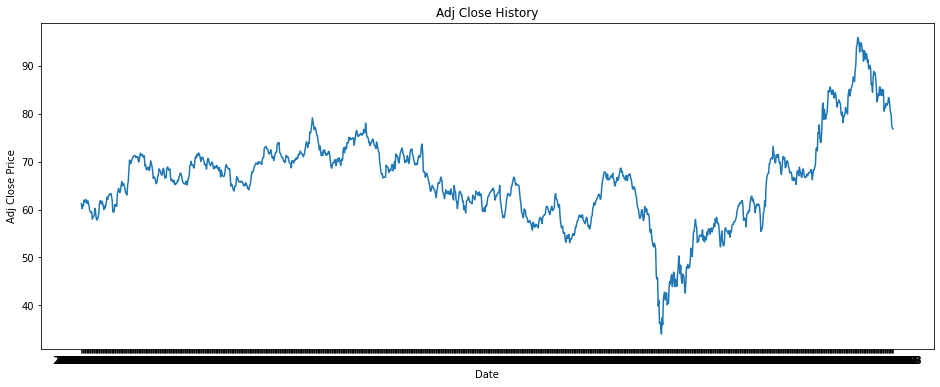

In [19]:
#Memvisualkan Harga Adjusted close saham BMW (Adj Close)
plt.figure(figsize=(16,6))
plt.title('Adj Close History')
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

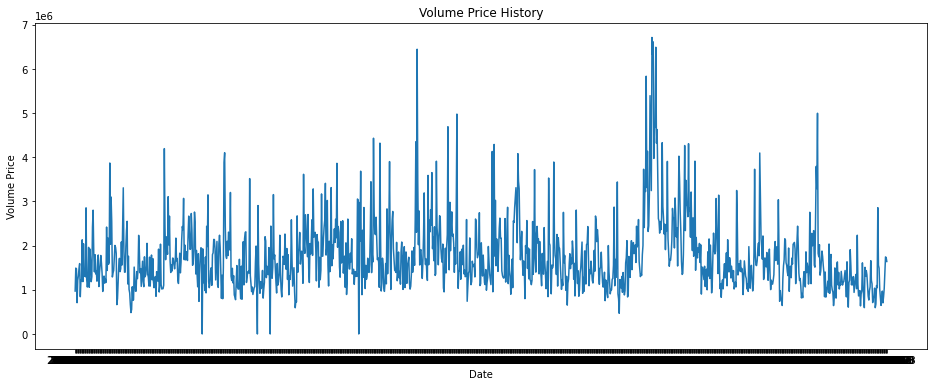

In [20]:
#Memvisualkan jumlah sekuritas yang diperdagangkan selama periode waktu tertentu (Volume)
plt.figure(figsize=(16,6))
plt.title('Volume Price History')
plt.plot(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.show()

**6. Persiapan Data (Data Preparation)**

In [21]:
# Buat Data Frame baru yang isinya hanya komom High
dataDf = data.filter(['High'])

In [22]:
# Memuat deskripsi setiap kolom dataframe
dataDf.describe()

,High
count,1266.000000
mean,76.463547
std,11.271610
min,39.514999
25%,69.367499
50%,77.784999
75%,85.745001
max,97.500000


In [23]:
# Memuat informasi dataframe
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1266 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [24]:
#Memuat 10 data pertama
dataDf.head(10)

,High
0,78.029999
1,76.839996
2,77.290001
3,77.230003
4,78.559998
5,79.279999
6,79.800003
7,78.769997
8,79.059998
9,78.620003


In [25]:
#Memuat 10 data terakhir
dataDf.tail(10)

,High
1256,82.160004
1257,82.480003
1258,83.400002
1259,83.900002
1260,82.570000
1261,81.199997
1262,80.519997
1263,78.449997
1264,77.089996
1265,78.480003


In [26]:
# Ubah dataframe ke numpy array
dataset = dataDf.values
# Mendaoatkan nomor baris unruk training
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1203

In [28]:
# Membuat training data set 
# Membuat scaled training data set
train_data = dataset[0:int(training_data_len), :]
# Membagi dataset keadalam x_train dan y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

#Normalisasi
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)

# Merubah x_train dan y_train ke numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([78.029999, 76.839996, 77.290001, 77.230003, 78.559998, 79.279999,
       79.800003, 78.769997, 79.059998, 78.620003, 78.849998, 78.519997,
       77.849998, 75.900002, 76.32    , 75.769997, 75.669998, 75.5     ,
       74.639999, 74.480003, 75.269997, 76.959999, 76.470001, 75.129997,
       74.440002, 74.489998, 75.059998, 75.129997, 77.68    , 78.389999,
       78.690002, 78.330002, 78.389999, 78.75    , 78.029999, 76.550003,
       77.550003, 76.940002, 77.239998, 78.589996, 79.669998, 79.190002,
       80.099998, 80.379997, 80.370003, 80.540001, 80.300003, 80.239998,
       79.989998, 77.589996, 76.279999, 75.720001, 77.370003, 77.5     ,
       76.949997, 77.720001, 80.150002, 82.540001, 81.730003, 81.669998])]
[81.57]

[array([78.029999, 76.839996, 77.290001, 77.230003, 78.559998, 79.279999,
       79.800003, 78.769997, 79.059998, 78.620003, 78.849998, 78.519997,
       77.849998, 75.900002, 76.32    , 75.769997, 75.669998, 75.5     ,
       74.639999, 74.480003, 75.269997

**7. Pembuatan dan evaluasi model**

In [29]:
# Pembuatan model LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
1143/1143 [==============================] - 29s 18ms/step - loss: 218.1171
Epoch 2/25
1143/1143 [==============================] - 21s 18ms/step - loss: 34.5796
Epoch 3/25
1143/1143 [==============================] - 21s 18ms/step - loss: 7.7981
Epoch 4/25
1143/1143 [==============================] - 21s 18ms/step - loss: 7.2016
Epoch 5/25
1143/1143 [==============================] - 21s 18ms/step - loss: 8.1011
Epoch 6/25
1143/1143 [==============================] - 21s 18ms/step - loss: 5.0868
Epoch 7/25
1143/1143 [==============================] - 21s 18ms/step - loss: 4.4892
Epoch 8/25
1143/1143 [==============================] - 21s 18ms/step - loss: 5.7704
Epoch 9/25
1143/1143 [==============================] - 21s 18ms/step - loss: 3.5153
Epoch 10/25
1143/1143 [==============================] - 21s 18ms/step - loss: 4.7507
Epoch 11/25
1143/1143 [==============================] - 21s 18ms/step - loss: 3.9862
Epoch 12/25
1143/1143 [==============================] - 21s

In [30]:
# Membuat testing data set
# Membuat array yang baru dengan isi nilai yang sudah discale dari index 1543 hingga 2002
test_data = dataset[training_data_len - 60: , :]
# Membuat data sets x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = scaler.transform(x_test)

# Merubah data ke numpy array
x_test = np.array(x_test)

# Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Mendapatkan nilai model prediksi harga 
predictions = model.predict(x_test)

# Mendapatkan root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.4046666630656899

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


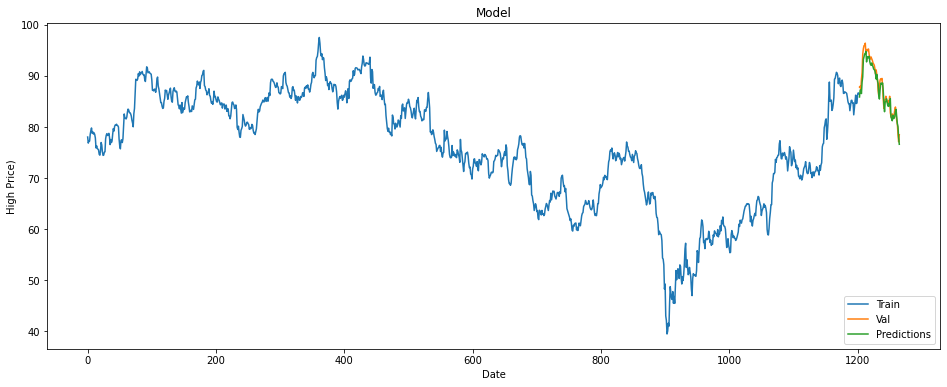

In [31]:
# Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualisasi data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('High Price)')
plt.plot(train['High'])
plt.plot(valid[['High', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
# Menunjukkan harga yang valid dan harga prediksi
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
1203,2021-05-27,86.339996,87.809998,85.720001,87.680000,87.680000,1633744,85.855797
1204,2021-05-28,87.820000,87.959999,87.139999,87.209999,87.209999,970900,87.206352
1205,2021-05-31,86.480003,87.260002,86.320000,86.699997,86.699997,607470,87.230804
1206,2021-06-01,87.669998,89.360001,87.669998,89.010002,89.010002,1163996,86.531128
1207,2021-06-02,89.220001,90.639999,88.830002,90.300003,90.300003,1217637,88.748573
...,...,...,...,...,...,...,...,...
1261,2021-08-17,81.000000,81.199997,80.190002,80.349998,80.349998,1033666,81.960968
1262,2021-08-18,80.519997,80.519997,78.940002,79.849998,79.849998,1366350,80.604347
1263,2021-08-19,77.349998,78.449997,77.080002,77.430000,77.430000,1743934,80.023926
1264,2021-08-20,77.000000,77.089996,75.410004,76.980003,76.980003,1731505,77.910332
